# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, ttest_ind

# Loading Data

In [2]:
data = pd.read_csv('./Fraudulent_E-Commerce_Transaction_Data_2.csv')

# Displaying Data

In [3]:
data

,Transaction ID,Customer ID,Transaction Amount,Transaction Date,Payment Method,Product Category,Quantity,Customer Age,Customer Location,Device Used,IP Address,Shipping Address,Billing Address,Is Fraudulent,Account Age Days,Transaction Hour
0,c12e07a0-8a06-4c0d-b5cc-04f3af688570,8ca9f102-02a4-4207-ab63-484e83a1bdf0,42.32,2024-03-24 23:42:43,PayPal,electronics,1,40,East Jameshaven,desktop,110.87.246.85,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,5399 Rachel Stravenue Suite 718\nNorth Blakebu...,0,282,23
1,7d187603-7961-4fce-9827-9698e2b6a201,4d158416-caae-4b09-bd5b-15235deb9129,301.34,2024-01-22 00:53:31,credit card,electronics,3,35,Kingstad,tablet,14.73.104.153,"5230 Stephanie Forge\nCollinsbury, PR 81853","5230 Stephanie Forge\nCollinsbury, PR 81853",0,223,0
2,f2c14f9d-92df-4aaf-8931-ceaf4e63ed72,ccae47b8-75c7-4f5a-aa9e-957deced2137,340.32,2024-01-22 08:06:03,debit card,toys & games,5,29,North Ryan,desktop,67.58.94.93,"195 Cole Oval\nPort Larry, IA 58422","4772 David Stravenue Apt. 447\nVelasquezside, ...",0,360,8
3,e9949bfa-194d-486b-84da-9565fca9e5ce,b04960c0-aeee-4907-b1cd-4819016adcef,95.77,2024-01-16 20:34:53,credit card,electronics,5,45,Kaylaville,mobile,202.122.126.216,"7609 Cynthia Square\nWest Brenda, NV 23016","7609 Cynthia Square\nWest Brenda, NV 23016",0,325,20
4,7362837c-7538-434e-8731-0df713f5f26d,de9d6351-b3a7-4bc7-9a55-8f013eb66928,77.45,2024-01-16 15:47:23,credit card,clothing,5,42,North Edwardborough,desktop,96.77.232.76,"2494 Robert Ramp Suite 313\nRobinsonport, AS 5...","2494 Robert Ramp Suite 313\nRobinsonport, AS 5...",0,116,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23629,d8b7171f-bdd9-479c-b98b-396c621aebfe,98a3d94c-dc9a-4525-b273-e6ffe54cc5a4,53.73,2024-01-26 16:25:05,PayPal,toys & games,5,32,Rebeccafurt,tablet,173.97.197.128,USNV Clayton\nFPO AE 82639,USNV Clayton\nFPO AE 82639,0,363,16
23630,0fd12cf3-c641-4499-8de1-15dc4555cb0c,b3429f52-8b27-46b5-914c-4accd989edb4,47.42,2024-02-25 17:03:26,credit card,clothing,4,41,Nataliefort,desktop,133.222.22.48,"9288 Patricia Cape Apt. 527\nMelissaton, IL 38543","9288 Patricia Cape Apt. 527\nMelissaton, IL 38543",0,296,17
23631,649680d3-a684-44cb-95bf-9b454c3aa86d,066e25c9-4420-4224-bc3f-1a462708090e,1045.23,2024-03-28 23:46:47,bank transfer,health & beauty,1,9,East Shannonville,tablet,206.133.237.168,3015 Elizabeth Summit Suite 819\nEast Joelfort...,3015 Elizabeth Summit Suite 819\nEast Joelfort...,0,329,23
23632,c10dbb08-28fc-4ec1-9850-d4e98d2b9640,cde96e9c-f562-4b8c-8fa8-f356f474232b,34.25,2024-02-09 11:29:18,debit card,home & garden,2,39,Lake Nicole,mobile,16.204.137.130,"531 Brittany Pike\nNew Stacy, OR 87952","531 Brittany Pike\nNew Stacy, OR 87952",0,347,11


In [4]:
# Display data shape
print(data.shape)

(23634, 16)


In [5]:
# Display info about the DataFrame
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23634 entries, 0 to 23633
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Transaction ID      23634 non-null  object 
 1   Customer ID         23634 non-null  object 
 2   Transaction Amount  23634 non-null  float64
 3   Transaction Date    23634 non-null  object 
 4   Payment Method      23634 non-null  object 
 5   Product Category    23634 non-null  object 
 6   Quantity            23634 non-null  int64  
 7   Customer Age        23634 non-null  int64  
 8   Customer Location   23634 non-null  object 
 9   Device Used         23634 non-null  object 
 10  IP Address          23634 non-null  object 
 11  Shipping Address    23634 non-null  object 
 12  Billing Address     23634 non-null  object 
 13  Is Fraudulent       23634 non-null  int64  
 14  Account Age Days    23634 non-null  int64  
 15  Transaction Hour    23634 non-null  int64  
dtypes: f

In [6]:
# Display first few rows of the DataFrame
print(data.head())

                         Transaction ID                           Customer ID  \
0  c12e07a0-8a06-4c0d-b5cc-04f3af688570  8ca9f102-02a4-4207-ab63-484e83a1bdf0   
1  7d187603-7961-4fce-9827-9698e2b6a201  4d158416-caae-4b09-bd5b-15235deb9129   
2  f2c14f9d-92df-4aaf-8931-ceaf4e63ed72  ccae47b8-75c7-4f5a-aa9e-957deced2137   
3  e9949bfa-194d-486b-84da-9565fca9e5ce  b04960c0-aeee-4907-b1cd-4819016adcef   
4  7362837c-7538-434e-8731-0df713f5f26d  de9d6351-b3a7-4bc7-9a55-8f013eb66928   

   Transaction Amount     Transaction Date Payment Method Product Category  \
0               42.32  2024-03-24 23:42:43         PayPal      electronics   
1              301.34  2024-01-22 00:53:31    credit card      electronics   
2              340.32  2024-01-22 08:06:03     debit card     toys & games   
3               95.77  2024-01-16 20:34:53    credit card      electronics   
4               77.45  2024-01-16 15:47:23    credit card         clothing   

   Quantity  Customer Age    Customer Locati

In [7]:
# Display summary statistics of the DataFrame
print(data.describe())

       Transaction Amount      Quantity  Customer Age  Is Fraudulent  \
count        23634.000000  23634.000000  23634.000000   23634.000000   
mean           229.367099      3.000550     34.560210       0.051705   
std            282.046669      1.419663     10.009471       0.221436   
min             10.000000      1.000000     -2.000000       0.000000   
25%             69.070000      2.000000     28.000000       0.000000   
50%            151.415000      3.000000     35.000000       0.000000   
75%            296.127500      4.000000     41.000000       0.000000   
max           9716.500000      5.000000     73.000000       1.000000   

       Account Age Days  Transaction Hour  
count      23634.000000      23634.000000  
mean         178.660531         11.266015  
std          107.388682          6.980659  
min            1.000000          0.000000  
25%           84.000000          5.000000  
50%          178.000000         11.000000  
75%          272.000000         17.000000  

# Exploratory Data Analysis

## 1. Change DTypes of categorical columns

In [8]:
# Change dtypes of categorical columns
data['Transaction Date'] = pd.to_datetime(data['Transaction Date'])
data['Payment Method'] = data['Payment Method'].astype('category')
data['Product Category'] = data['Product Category'].astype('category')
data['Device Used'] = data['Device Used'].astype('category')

## 2. Check for missing values

In [9]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

Transaction ID        0
Customer ID           0
Transaction Amount    0
Transaction Date      0
Payment Method        0
Product Category      0
Quantity              0
Customer Age          0
Customer Location     0
Device Used           0
IP Address            0
Shipping Address      0
Billing Address       0
Is Fraudulent         0
Account Age Days      0
Transaction Hour      0
dtype: int64


Insight: No missing values, no need for dropping or filling of data

## 3. Distribution of Target Variable

Is Fraudulent
0    22412
1     1222
Name: count, dtype: int64


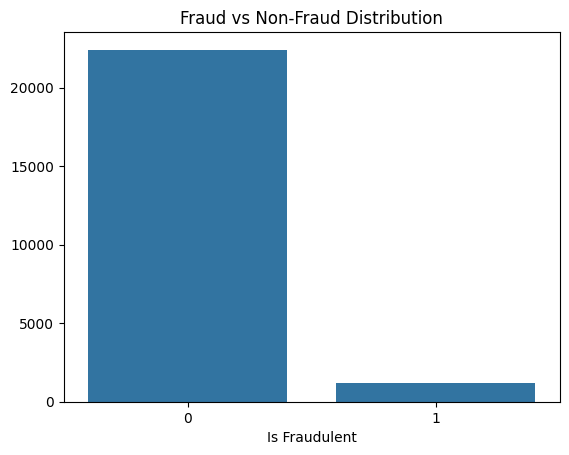

Fraud Ratio: 5.17051705170517%


In [10]:
# Visualize the distribution of the target variable
fraud_counts = data['Is Fraudulent'].value_counts()
print(fraud_counts)
sns.barplot(x=fraud_counts.index, y=fraud_counts.values)
plt.title("Fraud vs Non-Fraud Distribution")
plt.show()
print(f"Fraud Ratio: {data['Is Fraudulent'].mean() * 100}%")

Insight: The dataset is highly imbalanced. Only about 5.17% of the transactions are fraudulent. This is a critical finding. It means that a model that simply predicts "not fraudulent" every time will be 94.83% accurate. Therefore, accuracy is a poor metric for this problem. We must focus on metrics like Precision, Recall, F1-Score, and the AUC-ROC curve for classification task. Additionally, we might have to use methods like oversampling the minority class, undersampling the majority class or applying class weights.

## 4. Transaction Amount by Fraud Status

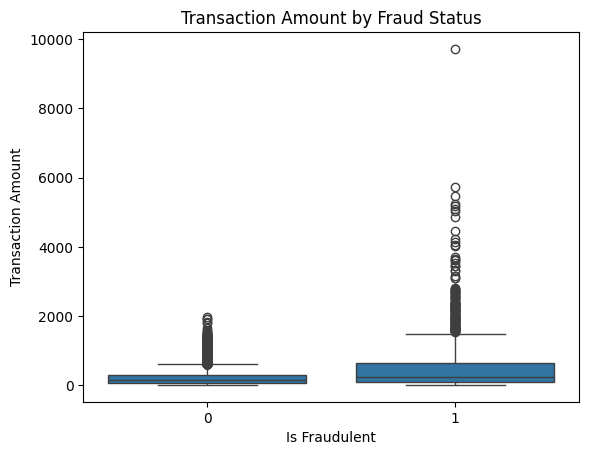

In [11]:
# Visualize transaction amounts for fraudulent vs non-fraudulent transactions
sns.boxplot(x='Is Fraudulent', y='Transaction Amount', data=data)
plt.title("Transaction Amount by Fraud Status")
plt.show()

Insight: While the median transaction amount is slightly higher for fraudulent transactions, the most significant difference is in the variance and presence of high-value outliers. The fraudulent group has a much wider spread of transaction amounts and contains many more extreme high-value transactions. This suggests that Transaction Amount is a valuable feature, especially for identifying unusually large purchases.

## 5. Distribution of Numeric Features

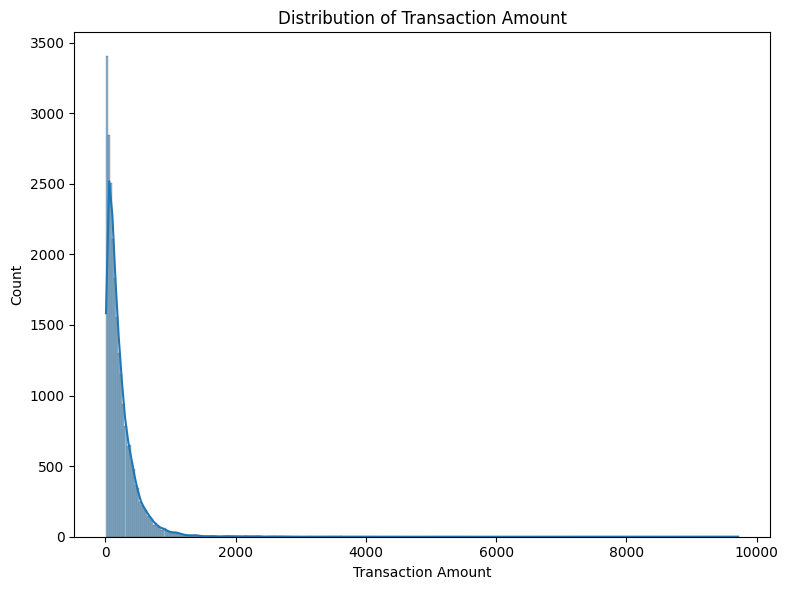

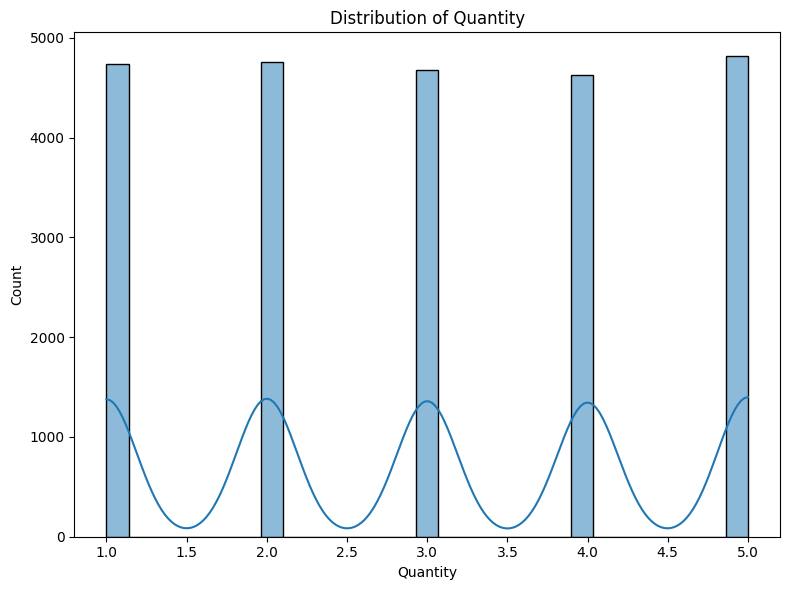

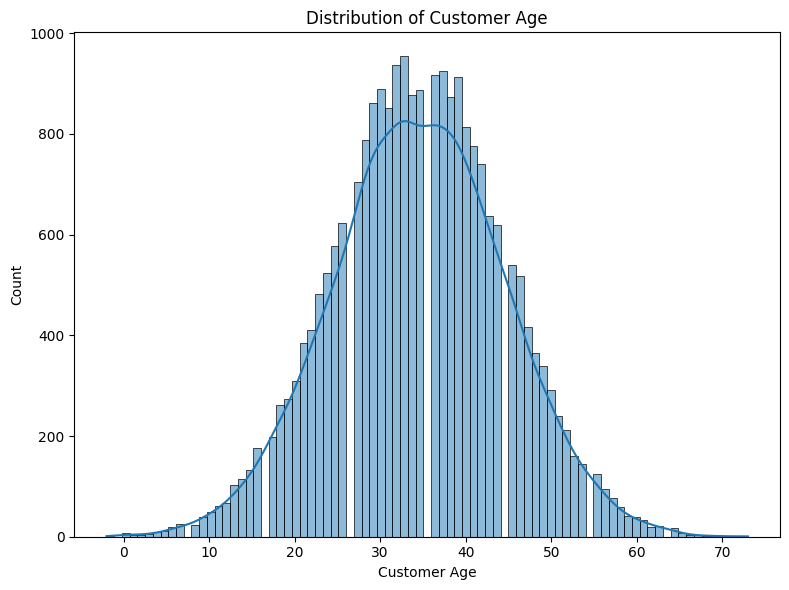

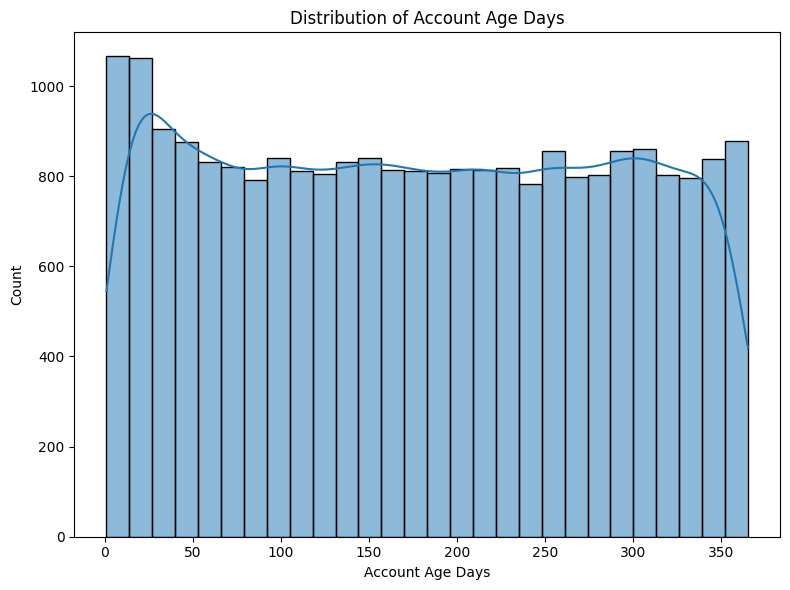

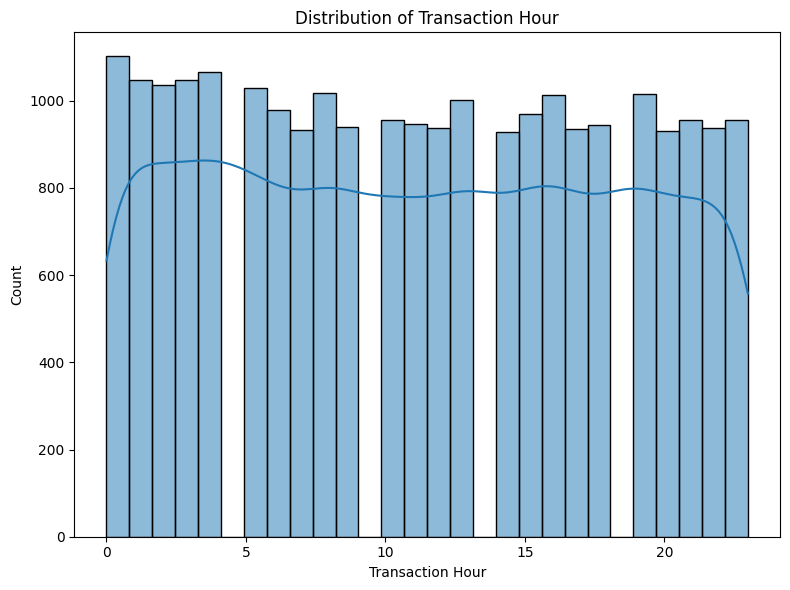

In [12]:
# Select numeric columns
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Plot distributions
for col in numeric_cols:
    if col == 'Is Fraudulent':
        continue
    plt.figure(figsize=(8, 6))
    sns.histplot(data[col], kde=True)
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    plt.show()


Insight: The transaction amounts are heavily right-skewed, with the vast majority of transactions being of low value. This is typical for e-commerce data. For some machine learning models (like linear regression or models that assume normality), applying a log transformation to this feature can improve performance.

## 6. Analyzing Temporal Patterns

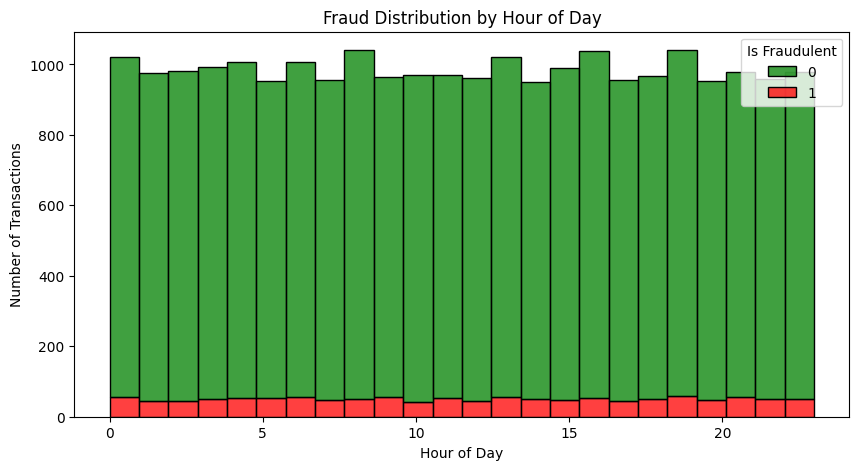

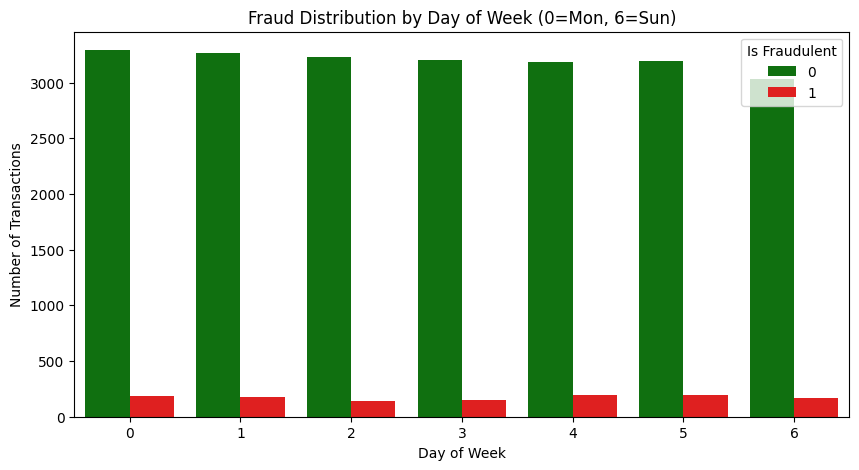

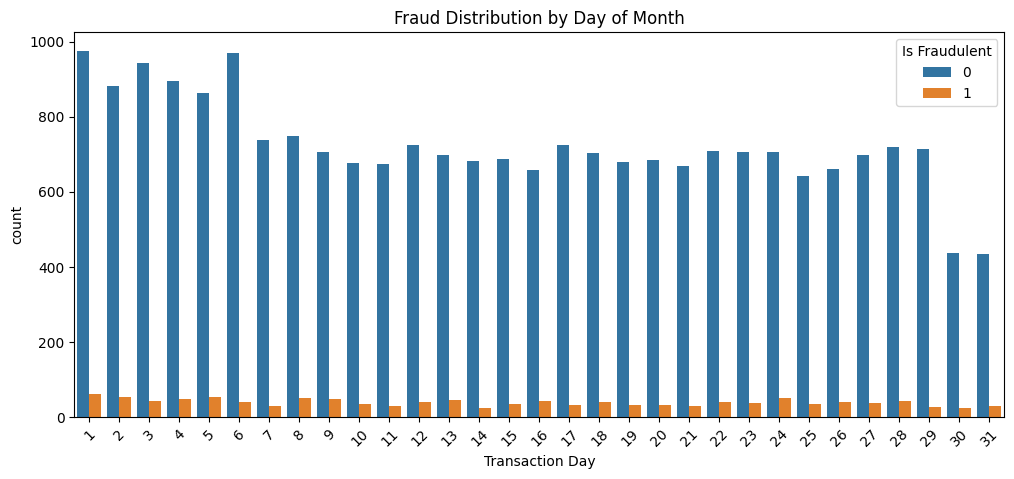

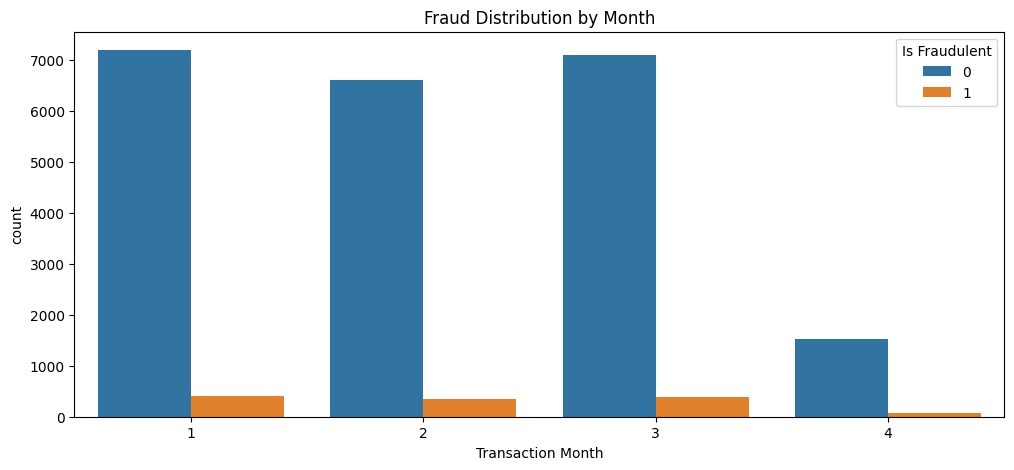

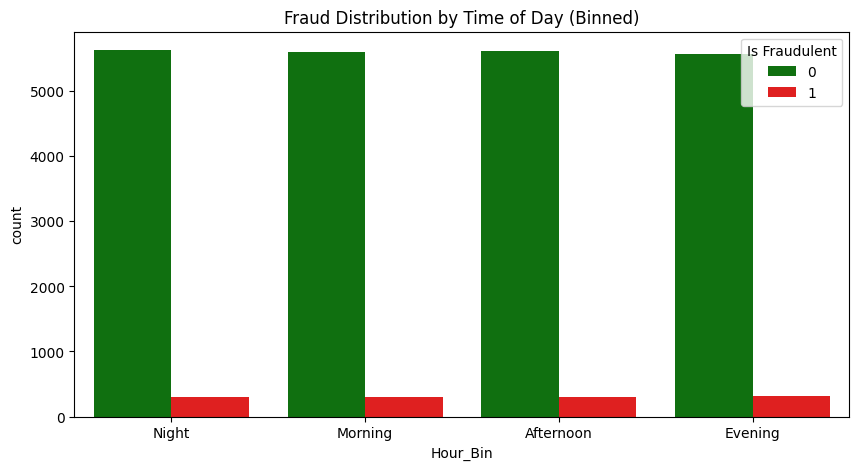


Average fraud rate by hour:
 Transaction Hour
0     0.055773
1     0.046154
2     0.045825
3     0.049345
4     0.051587
5     0.056663
6     0.054672
7     0.049215
8     0.049038
9     0.059129
10    0.044330
11    0.055728
12    0.047817
13    0.053816
14    0.052687
15    0.048485
16    0.052073
17    0.048067
18    0.052686
19    0.057637
20    0.050314
21    0.058223
22    0.051148
23    0.050000
Name: Is Fraudulent, dtype: float64

Average fraud rate by weekday:
 Transaction Weekday
0    0.054566
1    0.050843
2    0.042925
3    0.045265
4    0.058876
5    0.056375
6    0.053026
Name: Is Fraudulent, dtype: float64

Average fraud rate by day of month:
 Transaction Day
1     0.059730
2     0.056684
3     0.042596
4     0.051907
5     0.058952
6     0.040554
7     0.040260
8     0.063830
9     0.063745
10    0.050491
11    0.043909
12    0.053525
13    0.063087
14    0.036775
15    0.048476
16    0.059914
17    0.043536
18    0.053763
19    0.044944
20    0.046025
21    0.041547
2

In [13]:
def analyze_temporal_patterns(data, target_col='Is Fraudulent'):
    """
    Extracts temporal features from 'Transaction Date' and analyzes fraud patterns
    across hours, days of week, day of month, month, and binned hours.
    
    Args:
        data (pd.DataFrame): Transaction dataset with 'Transaction Date' and target column
        target_col (str): Name of the target column (default: 'Is Fraudulent')
    
    Returns:
        pd.DataFrame: Original data with added temporal features
    """
    # Ensure datetime
    data['Transaction Date'] = pd.to_datetime(data['Transaction Date'])

    # --- Extract Temporal Features ---
    data['Transaction Hour'] = data['Transaction Date'].dt.hour
    data['Transaction Weekday'] = data['Transaction Date'].dt.weekday
    data['Is_Weekend'] = (data['Transaction Weekday'] >= 5).astype(int)
    data['Transaction Day'] = data['Transaction Date'].dt.day
    data['Transaction Month'] = data['Transaction Date'].dt.month

    # Bin hours into day periods
    bins = [0, 6, 12, 18, 24]
    labels = ['Night', 'Morning', 'Afternoon', 'Evening']
    data['Hour_Bin'] = pd.cut(data['Transaction Hour'], bins=bins, labels=labels, right=False)

    # --- Visualizations ---
    plt.figure(figsize=(10,5))
    sns.histplot(data=data, x='Transaction Hour', hue=target_col, multiple='stack', bins=24, palette=['green', 'red'])
    plt.title("Fraud Distribution by Hour of Day")
    plt.xlabel("Hour of Day")
    plt.ylabel("Number of Transactions")
    plt.show()

    plt.figure(figsize=(10,5))
    sns.countplot(data=data, x='Transaction Weekday', hue=target_col, palette=['green', 'red'])
    plt.title("Fraud Distribution by Day of Week (0=Mon, 6=Sun)")
    plt.xlabel("Day of Week")
    plt.ylabel("Number of Transactions")
    plt.show()

    plt.figure(figsize=(12,5))
    sns.countplot(data=data, x='Transaction Day', hue=target_col)
    plt.title("Fraud Distribution by Day of Month")
    plt.xticks(rotation=45)
    plt.show()

    plt.figure(figsize=(12,5))
    sns.countplot(data=data, x='Transaction Month', hue=target_col)
    plt.title("Fraud Distribution by Month")
    plt.show()

    plt.figure(figsize=(10,5))
    sns.countplot(data=data, x='Hour_Bin', hue=target_col, palette=['green', 'red'])
    plt.title("Fraud Distribution by Time of Day (Binned)")
    plt.show()

    # --- Summary Stats ---
    fraud_rate_by_hour = data.groupby('Transaction Hour')[target_col].mean()
    fraud_rate_by_weekday = data.groupby('Transaction Weekday')[target_col].mean()
    fraud_rate_by_day = data.groupby('Transaction Day')[target_col].mean()
    fraud_rate_by_month = data.groupby('Transaction Month')[target_col].mean()

    print("\nAverage fraud rate by hour:\n", fraud_rate_by_hour)
    print("\nAverage fraud rate by weekday:\n", fraud_rate_by_weekday)
    print("\nAverage fraud rate by day of month:\n", fraud_rate_by_day)
    print("\nAverage fraud rate by month:\n", fraud_rate_by_month)

    return data

data = analyze_temporal_patterns(data, target_col='Is Fraudulent')

Insight: While fraudulent transactions are generally distributed across all hours, weekdays, and months, there are subtle temporal patterns that emerge. Fraud rates tend to be slightly higher during early morning and evening hours, on Fridays and Saturdays, and on specific days of the month (e.g., 8th, 9th, 24th, 31st). This suggests that temporal features alone may not be strong predictors, but they can provide incremental value when combined with other behavioral, transactional, or customer-based features in a fraud detection model.

## 7. Analyzing Categorical Features

/var/folders/wp/6lr6qb7j2bv096grzncp2yyh0000gn/T/ipykernel_34137/1146943956.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_rate = data.groupby(col)['Is Fraudulent'].mean().sort_values(ascending=False)


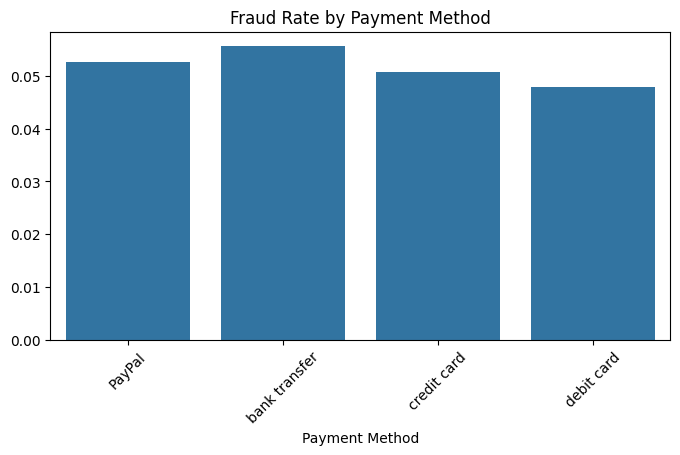

/var/folders/wp/6lr6qb7j2bv096grzncp2yyh0000gn/T/ipykernel_34137/1146943956.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_rate = data.groupby(col)['Is Fraudulent'].mean().sort_values(ascending=False)


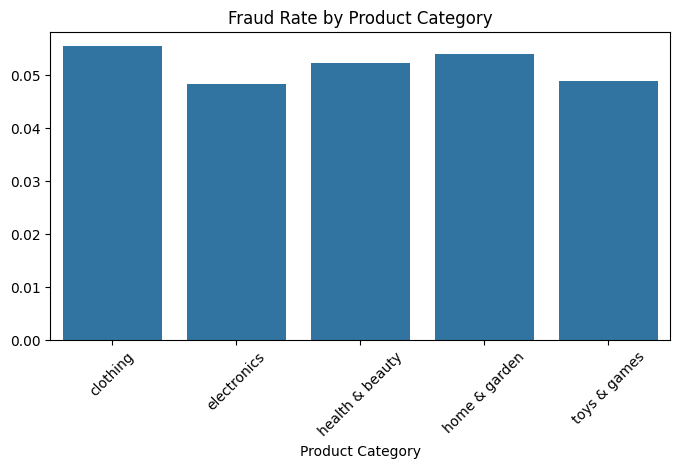

/var/folders/wp/6lr6qb7j2bv096grzncp2yyh0000gn/T/ipykernel_34137/1146943956.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fraud_rate = data.groupby(col)['Is Fraudulent'].mean().sort_values(ascending=False)


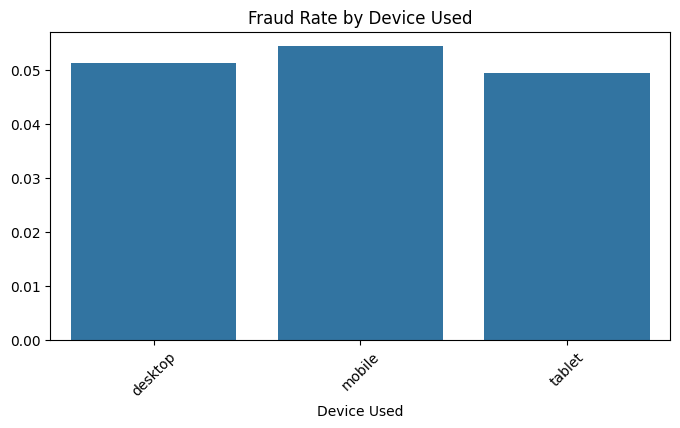

In [14]:
# Analyze fraud rates across categorical features
categorical_cols = ['Payment Method', 'Product Category', 'Device Used']

for col in categorical_cols:
    fraud_rate = data.groupby(col)['Is Fraudulent'].mean().sort_values(ascending=False)
    plt.figure(figsize=(8,4))
    sns.barplot(x=fraud_rate.index, y=fraud_rate.values)
    plt.title(f"Fraud Rate by {col}")
    plt.xticks(rotation=45)
    plt.show()

Insight: The fraud rate is remarkably consistent (around 5%) across all categories for these features. For example, using a 'bank transfer' isn't significantly more or less risky than using a 'credit card'. This means these features, in their current form, have low predictive power on their own. However, they could still be useful in combination with other features (e.g., a high-value 'electronics' purchase on a 'mobile' device).

## 8. Analyzing Customer Demographics

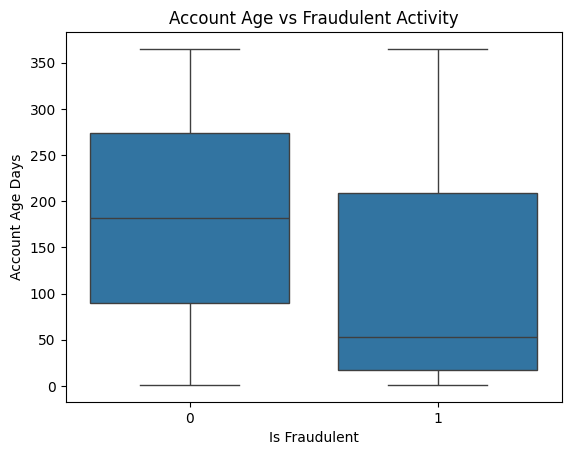

In [15]:
# Customer demographics analysis
sns.boxplot(x='Is Fraudulent', y='Account Age Days', data=data)
plt.title("Account Age vs Fraudulent Activity")
plt.show()

Insight: This is a very strong signal. Fraudulent activity is heavily concentrated in newer accounts. The median account age for fraudulent transactions is significantly lower than for non-fraudulent ones. This is a classic fraud pattern: fraudsters create new accounts to burn before they get caught. Account Age Days will be a crucial feature.

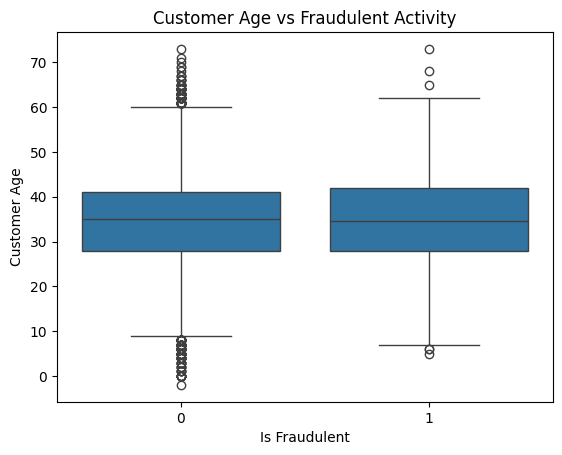

In [16]:
sns.boxplot(x='Is Fraudulent', y='Customer Age', data=data)
plt.title("Customer Age vs Fraudulent Activity")
plt.show()

Insight: Unlike account age, the customer's actual age shows almost no difference between fraudulent and non-fraudulent transactions. The distributions are nearly identical. This feature is likely to have very low predictive power.

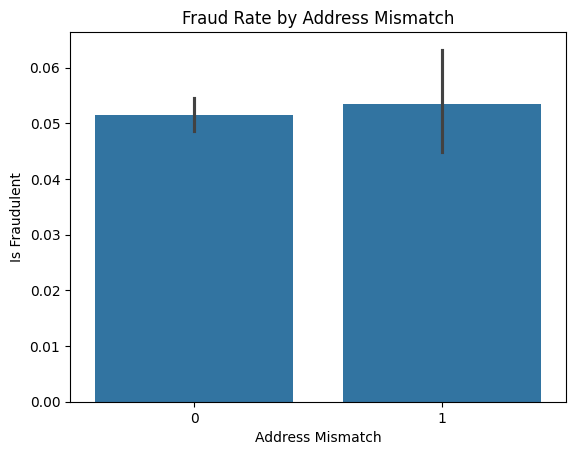

In [17]:
# Address mismatch analysis
data['Address Mismatch'] = (data['Shipping Address'] != data['Billing Address']).astype(int)
sns.barplot(x='Address Mismatch', y='Is Fraudulent', data=data)
plt.title("Fraud Rate by Address Mismatch")
plt.show()

Insight: An address mismatch does not significantly increase the fraud rate in this dataset. This is somewhat surprising, as it's often a red flag. It could be that many legitimate customers (e.g., those sending gifts) have mismatches, diluting the signal from fraudsters.

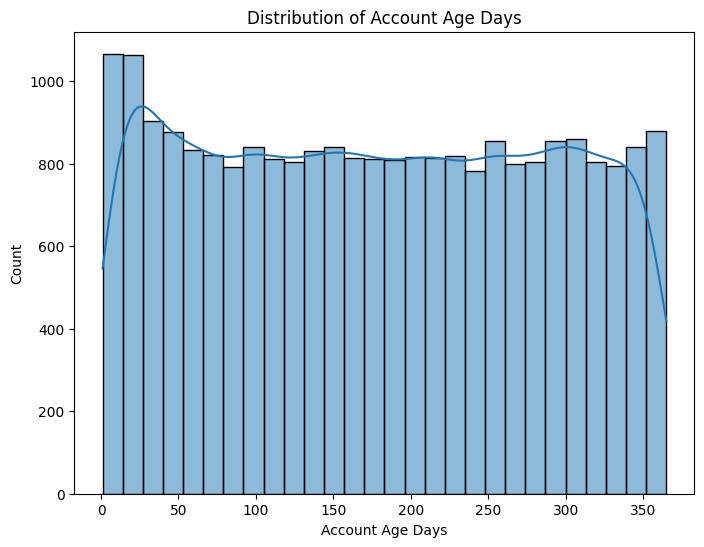

In [18]:
# Visualize the distribution of Account Age Days
plt.figure(figsize=(8, 6))
sns.histplot(data['Account Age Days'], kde=True)
plt.xlabel('Account Age Days')
plt.ylabel('Count')
plt.title('Distribution of Account Age Days')
plt.show()

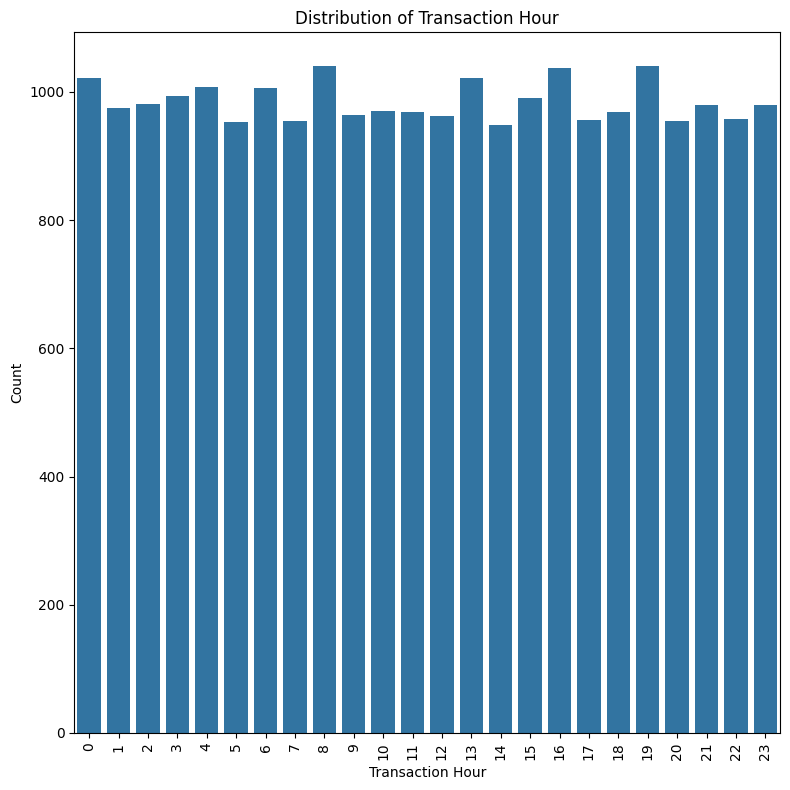

In [19]:
# Visualize the distribution of Transaction Hour
plt.figure(figsize=(8, 8))
sns.countplot(x='Transaction Hour', data=data)
plt.xlabel('Transaction Hour')
plt.ylabel('Count')
plt.title('Distribution of Transaction Hour')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Insight: the distribution is remarkably uniform. low standalone predictive power.

## 9. Correlation Between Numeric Features

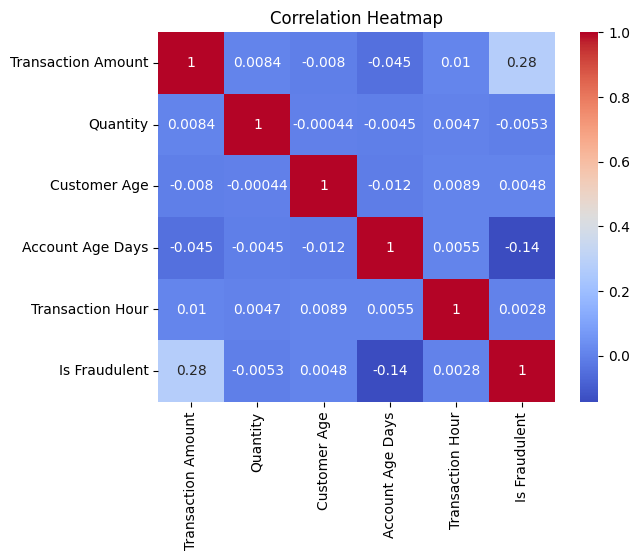

In [20]:
# Correlation analysis
numeric_cols = ['Transaction Amount', 'Quantity', 'Customer Age', 'Account Age Days', 'Transaction Hour']
corr = data[numeric_cols + ['Is Fraudulent']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

Insight: The heatmap confirms the previous findings numerically. Transaction Amount has the strongest positive linear correlation (0.28) with fraud, and Account Age Days has the strongest negative correlation (-0.14). The other numeric features have near-zero correlation, indicating little to no linear relationship with fraud.

## 10. Importance of categorical variables with target variable

In [21]:
def categorical_target_association(df, target_col):
    results = []

    # Select categorical columns (exclude ID-like ones)
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns
    print(categorical_cols)

    for col in categorical_cols:
        # Skip columns that are unique identifiers
        if df[col].nunique() > 50:
            continue
        
        unique_vals = df[col].nunique()
        target = df[target_col]
        
        # Binary categorical → use t-test
        if unique_vals == 2:
            groups = []
            for val in df[col].unique():
                groups.append(target[df[col] == val])
            
            t_stat, p_val = ttest_ind(groups[0], groups[1], equal_var=False)
            test_type = 't-test'
        
        # Multi-category → use chi-squared test
        else:
            contingency = pd.crosstab(df[col], target)
            chi2, p_val, dof, expected = chi2_contingency(contingency)
            test_type = 'chi-square'
        
        results.append({
            'Feature': col,
            'Unique Values': unique_vals,
            'Test': test_type,
            'p-value': p_val
        })

    results_df = pd.DataFrame(results)
    results_df['Significant (p<0.05)'] = results_df['p-value'] < 0.05
    return results_df.sort_values('p-value')

results = categorical_target_association(data, 'Is Fraudulent')
print(results)

Index(['Transaction ID', 'Customer ID', 'Payment Method', 'Product Category',
       'Customer Location', 'Device Used', 'IP Address', 'Shipping Address',
       'Billing Address', 'Hour_Bin'],
      dtype='object')
            Feature  Unique Values        Test   p-value  Significant (p<0.05)
0    Payment Method              4  chi-square  0.284269                 False
2       Device Used              3  chi-square  0.356638                 False
1  Product Category              5  chi-square  0.444859                 False
3          Hour_Bin              4  chi-square  0.896549                 False


Insight: The Chi Square analysis showed that there is no statistical significance between the categorical variables and target variable as all p-values are above 0.05. This indicates that these features alone do not strongly differentiate between fraud and legitimate transactions. There is a need to combine these categorical features with other features.

# More indepth EDA

## Are high-value fraudulent transactions more common in specific product categories?

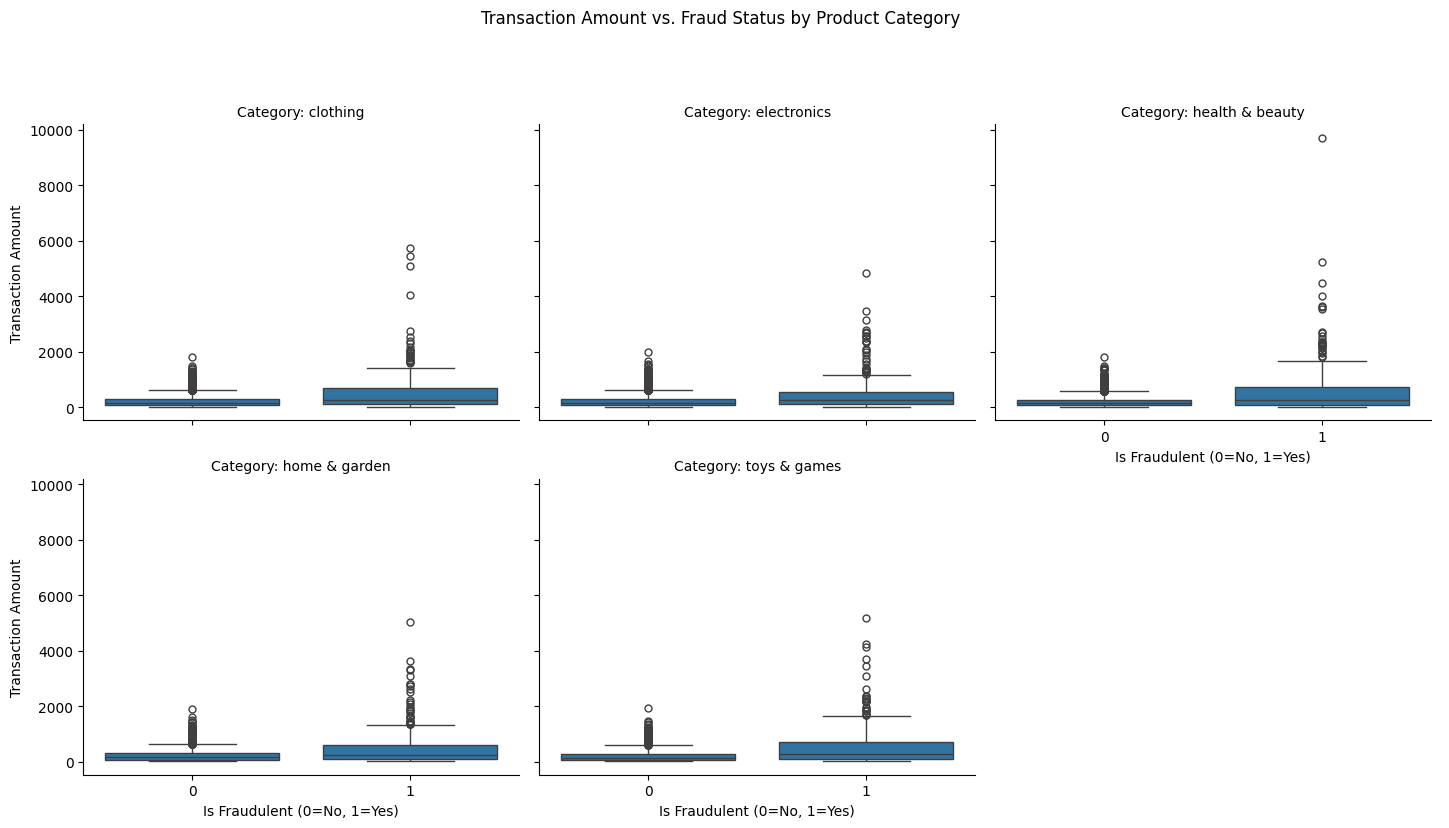

In [22]:
# Create a faceted boxplot
g = sns.catplot(
    x='Is Fraudulent', 
    y='Transaction Amount', 
    col='Product Category', 
    data=data, 
    kind='box',
    col_wrap=3, # Wraps the plots into 3 columns
    height=4,
    aspect=1.2
)

# Set titles and labels for clarity
g.fig.suptitle('Transaction Amount vs. Fraud Status by Product Category', y=1.03)
g.set_axis_labels("Is Fraudulent (0=No, 1=Yes)", "Transaction Amount")
g.set_titles("Category: {col_name}")

# To prevent clipping of the suptitle
plt.tight_layout(rect=[0, 0, 1, 0.97])
plt.show()

Insight: The general pattern holds true across all categories: fraudulent transactions (1) have a higher median amount and significantly more high-value outliers than non-fraudulent transactions (0).

## How many unique IPs/Addresses does a customer use? (Fraud rings)

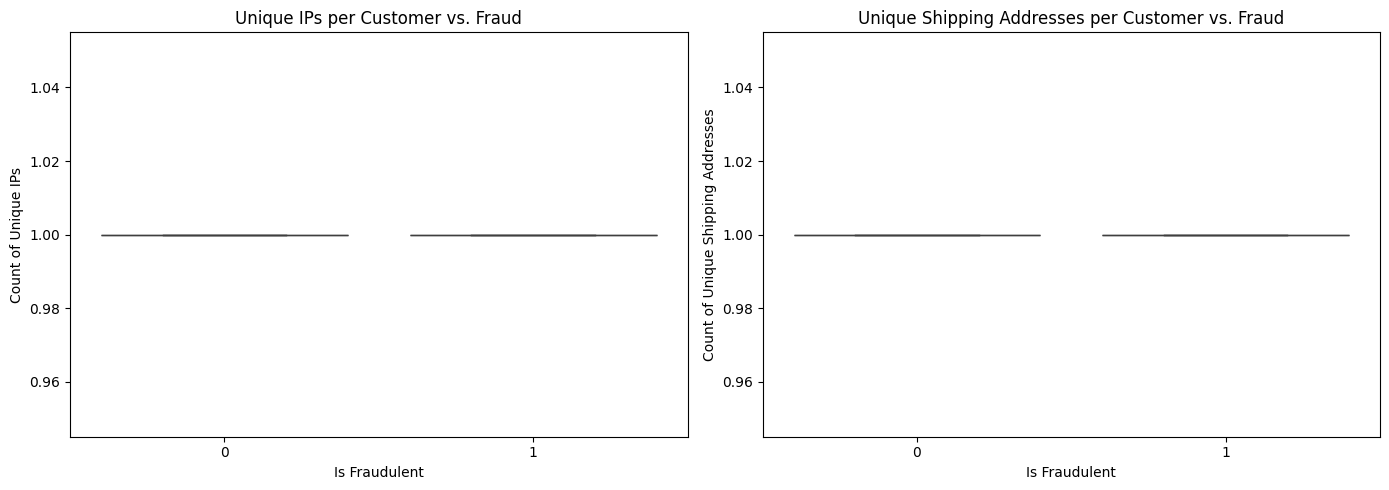

In [23]:
# Group by Customer ID and count unique IPs and Shipping Addresses
customer_behavior = data.groupby('Customer ID').agg(
    unique_ips_per_customer=pd.NamedAgg(column='IP Address', aggfunc='nunique'),
    unique_shipping_add_per_customer=pd.NamedAgg(column='Shipping Address', aggfunc='nunique')
).reset_index()

# Merge this back into the main dataframe
data = pd.merge(data, customer_behavior, on='Customer ID', how='left')

# Visualize the findings
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

sns.boxplot(x='Is Fraudulent', y='unique_ips_per_customer', data=data, ax=axes[0])
axes[0].set_title('Unique IPs per Customer vs. Fraud')
axes[0].set_ylabel('Count of Unique IPs')

sns.boxplot(x='Is Fraudulent', y='unique_shipping_add_per_customer', data=data, ax=axes[1])
axes[1].set_title('Unique Shipping Addresses per Customer vs. Fraud')
axes[1].set_ylabel('Count of Unique Shipping Addresses')

plt.tight_layout()
plt.show()

Insight: Every customer has exactly one unique IP and one unique shipping address, and consequently, no IP addresses are ever shared.
This is completely unrealistic and is the strongest evidence yet that this is a heavily sanitized or synthetic dataset. In the real world, customers use multiple devices (phone, work PC, home laptop) and send gifts to different addresses. Fraud rings are often identified by many accounts using the same IP. 

## Compare a customer's current transaction to their own past behavior.

/var/folders/wp/6lr6qb7j2bv096grzncp2yyh0000gn/T/ipykernel_34137/2350264470.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['customer_avg_spend_before_tx'].fillna(0, inplace=True)


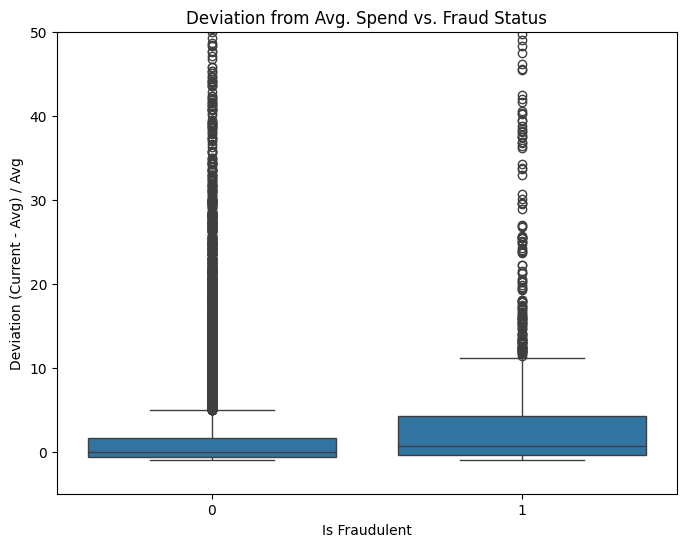

In [24]:
# Calculate a customer's expanding average spend *before* the current transaction
# shift(1) is crucial to prevent data leakage (using the current transaction's value in its own historical average)
data['customer_avg_spend_before_tx'] = data.groupby('Customer ID')['Transaction Amount'] \
                                           .expanding(min_periods=1).mean().shift(1) \
                                           .reset_index(level=0, drop=True)

# Fill NaN for the very first transaction of each customer
data['customer_avg_spend_before_tx'].fillna(0, inplace=True)

# Create the deviation feature
# Add a small epsilon (1) to the denominator to avoid division by zero for the first transaction
data['amount_deviation'] = (data['Transaction Amount'] - data['customer_avg_spend_before_tx']) / (data['customer_avg_spend_before_tx'] + 1)

# Visualize the deviation
plt.figure(figsize=(8, 6))
sns.boxplot(x='Is Fraudulent', y='amount_deviation', data=data)
plt.title('Deviation from Avg. Spend vs. Fraud Status')
plt.ylabel('Deviation (Current - Avg) / Avg')
# Outliers can skew the plot, so let's limit the y-axis for better visibility
plt.ylim(-5, 50) 
plt.show()

Insight: amount_deviation is likely to be one of the most important predictors. It successfully captures a core behavioral dynamic of fraud as the separation between the two classes is visually very clear.